In [1]:
from Basics import *
setplot(dark=True)

from cobaya.samplers.mcmc import plot_progress
from cobaya.model import get_model
from cobaya.yaml import yaml_load_file
from cobaya.run import run

In [ ]:
model = get_model("/global/homes/c/cpopik/Capybara/runchains.yaml")

2025-07-17 13:05:24.057420: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-17 13:05:24.057455: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-17 13:05:24.059268: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-17 13:05:24.069490: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-17 13:05:27.296277: W tensorflow/compiler/tf2

[model] *WARNING* Ignored blocks/options: ['sampler', 'output']
Loading Data
Loading Cosmology functions
Loading Galaxy Distributions
Loading SHMR
Loading HMF
Loading HOD
Loading Average Functions
Loading Projection Functions
Initializing Model


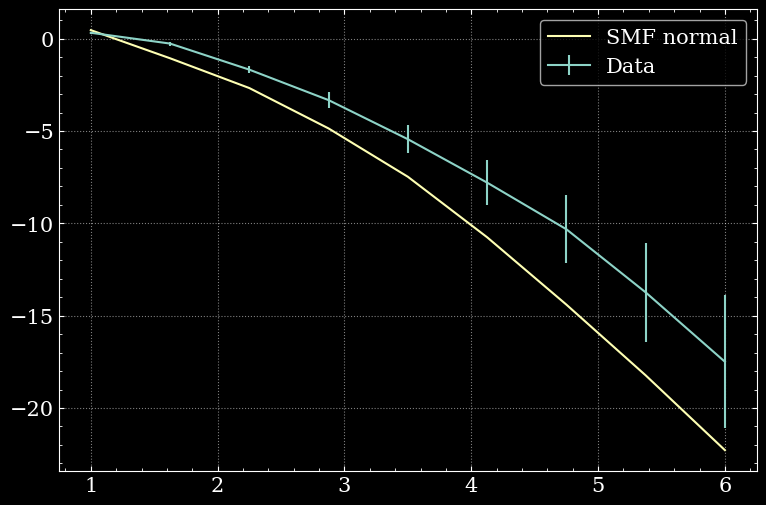

In [61]:
likeli = model.likelihood['tsztest']

plt.errorbar(likeli.meas.thetas, likeli.meas.tSZdata, np.diag(likeli.meas.tSZcov)**0.5, label='Data')

plt.plot(likeli.meas.thetas,
         likeli.sign(likeli.proj(likeli.ave_SMF(likeli.pth_1h()+likeli.pth_2h())))+likeli.meas.dustprof, label='SMF normal')


# proj2 = ForwardModel.project_Hankel(likeli.rs, likeli.meas.thetas, likeli.dA_func(0.55), likeli.meas.beam_data, likeli.meas.beam_ells, likeli.meas.resp_data, likeli.meas.resp_ells)

# plt.plot(likeli.meas.thetas,
#          likeli.sign(proj2(likeli.ave_SMF(likeli.pth_1h()*0.8+likeli.pth_2h())))+likeli.meas.dustprof, label='SMF change')

plt.legend()

[tools] *WARNING* Last row of chains/cobaya_TEST_0.001.progress is incomplete or contains NaNs


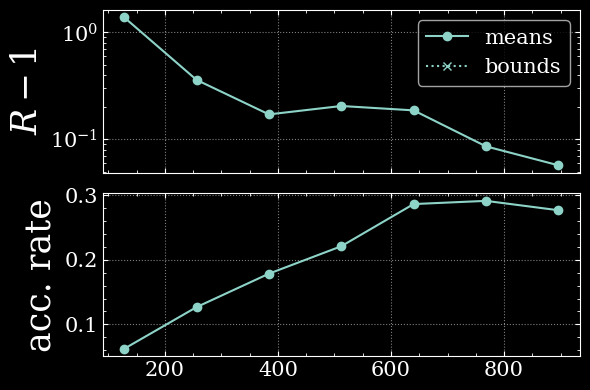

Index(['weight', 'minuslogpost', 'P0', 'alpha_t', 'beta_t', 'A2h_t',
       'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__tsztest'],
      dtype='object')

In [71]:
results = pd.DataFrame(np.genfromtxt("/global/homes/c/cpopik/Capybara/chains/cobaya_TEST_0.001.1.txt", names=True).T)

plot_progress("chains/cobaya_TEST_0.001", figure_kwargs={"figsize": (6,4)})

plt.tight_layout()
plt.show()

results.columns

In [72]:
info_from_yaml = yaml_load_file("/global/homes/c/cpopik/Capybara/runchains.yaml")

(1128, 10)

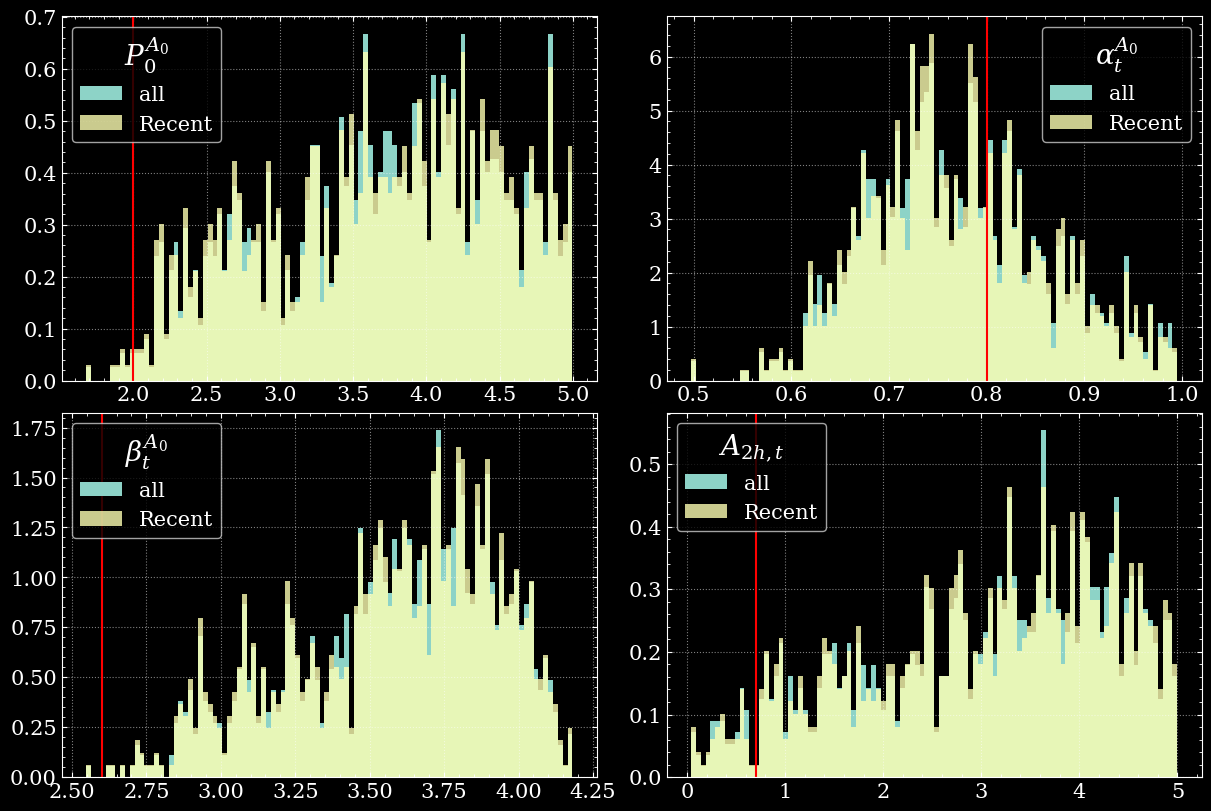

In [73]:
fitpars = [k for k, v in info_from_yaml['params'].items() if isinstance(v, dict) and "prior" in v]
fitparslab = [rf"${v['latex']}$" for k, v in info_from_yaml['params'].items() if isinstance(v, dict) and "prior" in v]
guessparsvals = [v['ref'] for k, v in info_from_yaml['params'].items() if isinstance(v, dict) and "prior" in v]

fig, axs = plt.subplots(2, 2, figsize=(12, 8), layout='constrained')
for ax, param, pstr, pval in zip(axs.flatten(), fitpars, fitparslab, guessparsvals):
    ax.hist(results[param], 100, density=True, label='all')
    ax.hist(results[param][-1000::], 100, density=True, alpha=0.8, label='Recent')
    ax.axvline(pval, c='r')
    ax.legend(title=pstr)

results.shape

INFO:output:Output to be read-from/written-into folder 'cobayatest/chains_TEST', with prefix 'cobaya_TEST_0.001'


[output] Output to be read-from/written-into folder 'cobayatest/chains_TEST', with prefix 'cobaya_TEST_0.001'


INFO:output:Found existing info files with the requested output prefix: 'cobayatest/chains_TEST/cobaya_TEST_0.001'


[output] Found existing info files with the requested output prefix: 'cobayatest/chains_TEST/cobaya_TEST_0.001'


INFO:output:Will delete previous products ('force' was requested).


[output] Will delete previous products ('force' was requested).


/global/u2/c/cpopik/Git/Capybara/SMFs.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.SMF = self.SMF_unweighted*self.zdistdf.groupby('zbin')[f"{bin}_{hemisphere}"].sum().values/np.trapz(self.SMF_unweighted, self.mstars, axis=0)


Loading Data
Loading Cosmology functions
Loading SMF
Loading SHMR
Loading HMF


INFO:minimize:Initializing


Loading HOD
Loading FFT
Loading FFT
Test calculation
Data: [ -0.03642943  -0.07246018  -1.08030807  -2.19914844  -3.98545661
  -6.19559573  -8.43387307 -11.72230438 -15.13739493], Theory: [ -0.02681449  -1.06377127  -2.57815483  -4.18564782  -5.7131645
  -7.05971726  -8.20542515  -9.28191209 -10.46457503]
[minimize] Initializing


INFO:samplecollection:Loaded 38720 sample points from 'cobayatest/chains_TEST/cobaya_TEST_0.001.1.txt'


[samplecollection] Loaded 38720 sample points from 'cobayatest/chains_TEST/cobaya_TEST_0.001.1.txt'


INFO:minimize:Run 1/2 will start from MAP of previous sample:


[minimize] Run 1/2 will start from MAP of previous sample:


INFO:minimize:{'A0_P0': 0.59016475, 'alpha_GNFW': 0.55833653, 'A0_beta': 1.2117117, 'A2h': 1.8592474}


[minimize] {'A0_P0': 0.59016475, 'alpha_GNFW': 0.55833653, 'A0_beta': 1.2117117, 'A2h': 1.8592474}


INFO:minimize:Run 2/2 will start from random initial point:


[minimize] Run 2/2 will start from random initial point:


INFO:minimize:{'A0_P0': 2.0, 'alpha_GNFW': 0.8, 'A0_beta': 2.6, 'A2h': 0.7}


[minimize] {'A0_P0': 2.0, 'alpha_GNFW': 0.8, 'A0_beta': 2.6, 'A2h': 0.7}


INFO:minimize:Covariance matrix from previous sample.


[minimize] Covariance matrix from previous sample.


INFO:minimize:Starting run 1/2


[minimize] Starting run 1/2


INFO:minimize:Run 1/2 converged.


[minimize] Run 1/2 converged.


INFO:minimize:Starting run 2/2


[minimize] Starting run 2/2


INFO:minimize:Run 2/2 converged.


[minimize] Run 2/2 converged.


INFO:minimize:Finished successfully!


[minimize] Finished successfully!


[minimize] *WARNING* Modest spread in minima: [77.74448015521578, 78.62548422602138]


INFO:minimize:-log(posterior) minimized to 77.7445


[minimize] -log(posterior) minimized to 77.7445


INFO:minimize:Parameter values at minimum:
   weight  minuslogpost     A0_P0  alpha_GNFW   A0_beta       A2h  minuslogprior  minuslogprior__0        chi2  chi2__cobayatest_py.TSZLikelihoodTEST
0     1.0      77.74448  0.589552    0.537987  1.209332  0.204431       7.846375          7.846375  139.796211                             139.796211


[minimize] Parameter values at minimum:
   weight  minuslogpost     A0_P0  alpha_GNFW   A0_beta       A2h  minuslogprior  minuslogprior__0        chi2  chi2__cobayatest_py.TSZLikelihoodTEST
0     1.0      77.74448  0.589552    0.537987  1.209332  0.204431       7.846375          7.846375  139.796211                             139.796211


INFO:minimize:Full set of minima:
{'0': (77.74448015521578, True), '1': (78.62548422602138, True)}


[minimize] Full set of minima:
{'0': (77.74448015521578, True), '1': (78.62548422602138, True)}


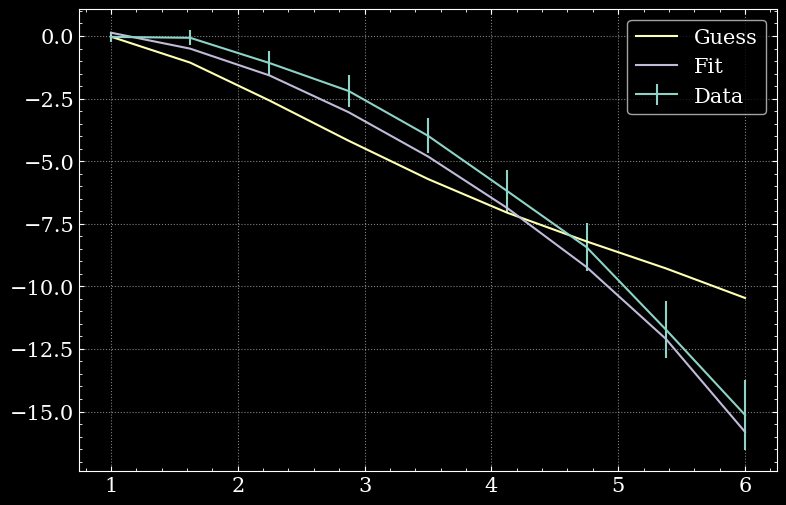

In [ ]:
updated_info_minimizer, minimizer = run(info_from_yaml, minimize=True, force=True)
minimum = minimizer.products()["minimum"]

fitparsmark = {k: minimum[k] for k, v in info_from_yaml['params'].items() if isinstance(v, dict) and "prior" in v}

plt.errorbar(model.thetas, model.meas, np.diag(model.cov)**0.5, label='Data')
plt.plot(model.thetas, model._get_theory(model.initpar), label='Guess')
plt.plot(model.thetas, model._get_theory(model.initpar | dict(minimum.MAP())), label='Fit')
plt.legend()

In [23]:
import getdist.plots as gdplt
%matplotlib inline

[root] *WARNING* auto bandwidth for logrho0 very small or failed (h=0.0005511055413276784,N_eff=1907.441081688556). Using fallback (h=0.08627045868201134)


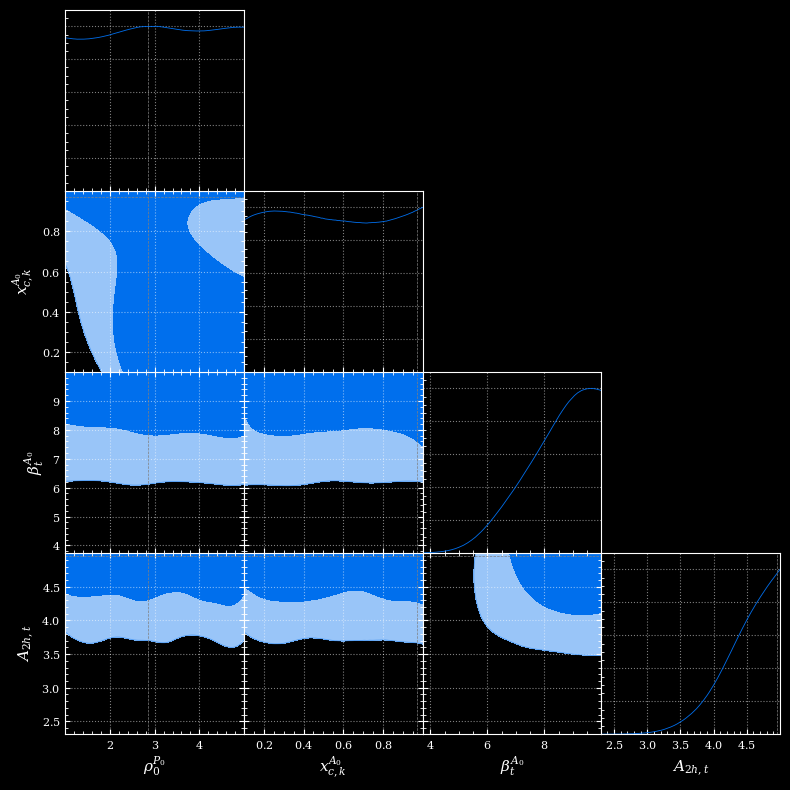

In [34]:
folder,name = os.path.split(os.path.abspath(info_from_yaml["output"]))
gdplot = gdplt.get_subplot_plotter(chain_dir=folder)
gdplot.settings.title_limit_fontsize=14

gdplot.triangle_plot(name, labels = fitparslab, params = fitpars, markers=fitparsmark, filled=True)
plt.savefig('cobaya_TEST.png',bbox_inches='tight')